In [43]:
import numpy as np

a = np.arange(-10, 12, 3)
d = a
print(a, type(a))

b = np.where(a>0)
print(list(zip(*np.where(a > 4))))
print(a[b[0]])


[-10  -7  -4  -1   2   5   8  11] <class 'numpy.ndarray'>
[(5,), (6,), (7,)]
[ 2  5  8 11]


In [1]:
import pytplot
pytplot.__path__

['/home/www/.local/lib/python3.8/site-packages/pytplot']

In [12]:
import numpy as np
import pytplot, pyspedas
from pytplot import tplot
detail_data = np.arange(10)
rough_data = np.arange(0,10, 3)
print(detail_data, rough_data)
pytplot.store_data('detail_data', data = {'x': detail_data, 'y': detail_data})
pytplot.store_data('rough_data', data = {'x': rough_data, 'y': rough_data})
pytplot.tplot_names()

[0 1 2 3 4 5 6 7 8 9] [0 3 6 9]
0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp']

In [13]:
pyspedas.tinterpol('rough_data', interp_to='detail_data')


tinterpol (linear) was applied to: rough_data-itrp


In [14]:
x = pytplot.get_data('rough_data')
y = pytplot.get_data('detail_data')
z = pytplot.get_data('rough_data-itrp')
x,y,z

(variable(times=array([0, 3, 6, 9]), y=array([0, 3, 6, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 variable(times=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), y=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])))

In [16]:
import load 


In [23]:
importer = load.orb(trange=['2000-01-01', '2000-01-02'])

In [24]:
import pytplot
pytplot.tplot_names()

0 : tinterpol_test
1 : tinterpol_test1
2 : tinterpol_test1-itrp
3 : tinterpol_test-itrp
4 : detail_data
5 : rough_data
6 : rough_data-itrp
7 : akb_Pass
8 : akb_ILAT
9 : akb_MLAT
10 : akb_MLT
11 : akb_ALT


['tinterpol_test',
 'tinterpol_test1',
 'tinterpol_test1-itrp',
 'tinterpol_test-itrp',
 'detail_data',
 'rough_data',
 'rough_data-itrp',
 'akb_Pass',
 'akb_ILAT',
 'akb_MLAT',
 'akb_MLT',
 'akb_ALT']

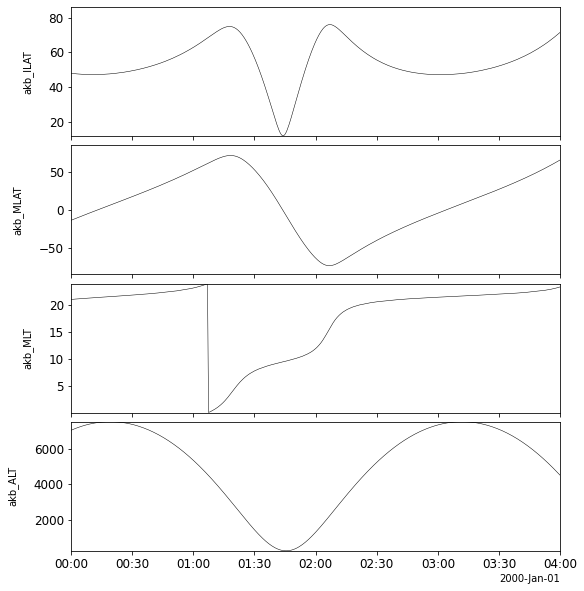

In [27]:
pytplot.tlimit(['2000-01-01 00:00:00', '2000-01-01 04:00:00'])
pytplot.tplot(['akb_ILAT', 'akb_MLAT', 'akb_MLT', 'akb_ALT'])

13-Jul-22 16:12:23: /home/www/.local/lib/python3.8/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),

13-Jul-22 16:12:23: /home/www/.local/lib/python3.8/site-packages/pytplot/MPLPlotter/tplot.py:236: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  this_axis.set_ylim(yrange)



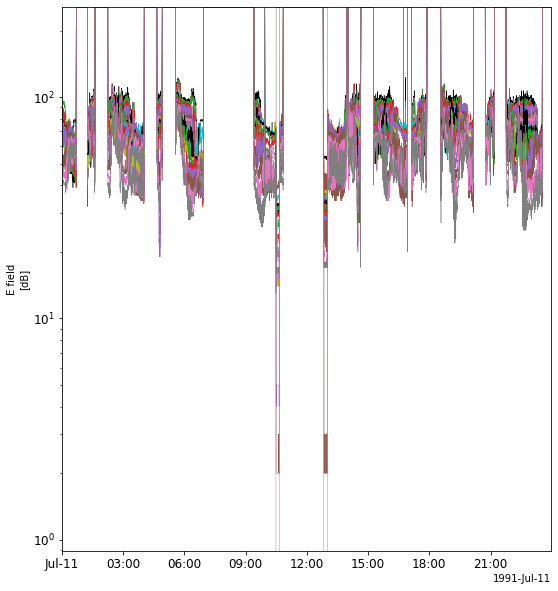

In [1]:
import load
import pytplot
import numpy as np
from pytplot import options
load.mca(trange=['1991-07-11', '1991-07-12'])

Emax = pytplot.get_data('Emax')
Emax.y
Bmax = pytplot.get_data('Bmax')
type(Emax.y)
pytplot.tlimit(['1991-07-11 00:00:00', '1991-07-11 23:59:00'])
pytplot.tplot('Emax')

In [8]:
print(np.count_nonzero( Emax.y == 255))

19


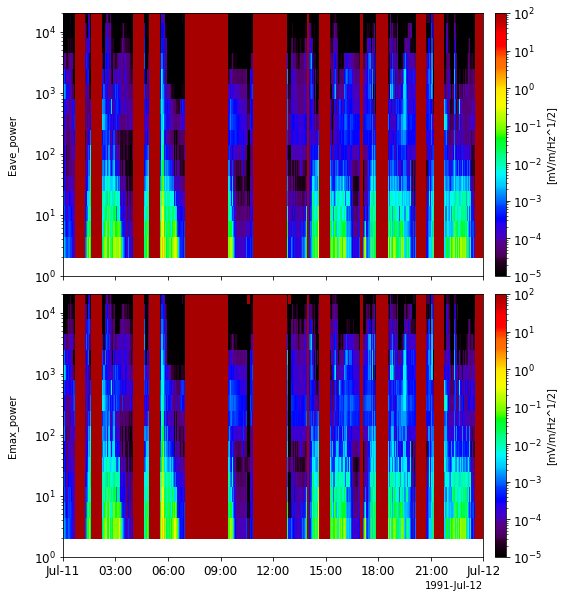

In [9]:
options(['Eave_power', 'Emax_power'], 'spec', 1)
options(['Eave_power', 'Emax_power'], 'ylog', 1)
options(['Eave_power', 'Emax_power'], 'zlog', 1)
options(['Eave_power', 'Emax_power'], 'zrange', [1e-5, 100])
options(['Eave_power', 'Emax_power'], 'yrange', [1, 2e4])
options(['Eave_power', 'Emax_power'], 'ztitle', '[mV/m/Hz^1/2]')
pytplot.tplot(['Eave_power', 'Emax_power'])

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <>:28: DeprecationWarning: invalid escape sequence \s

07-Jul-22 08:03:31: <ipython-input-40-09691759de28>:28: DeprecationWarning: invalid escape sequence \s
  plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')



Text(0, 0.5, '')

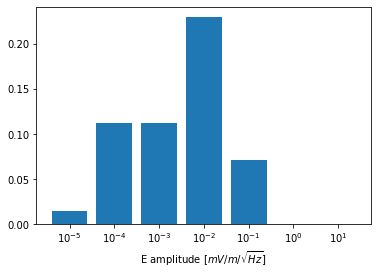

In [40]:
Emax = pytplot.get_data('Emax_amplitude')
Emax_T = Emax.y.T
Emax_1ch = Emax_T[0]
Emax_25dB = (10**(253/20)) * (1e-6)  / np.sqrt(3.16*0.3)

left = np.arange(7)
Emax_amp_0 = Emax_1ch.size
Emax_amp_1 = Emax_1ch[Emax_1ch < 1e1].size 
Emax_amp_2 = Emax_1ch[Emax_1ch < 1].size
Emax_amp_3 = Emax_1ch[Emax_1ch < 1e-1].size
Emax_amp_4 = Emax_1ch[Emax_1ch < 1e-2].size
Emax_amp_5 = Emax_1ch[Emax_1ch < 1e-3].size
Emax_amp_6 = Emax_1ch[Emax_1ch < 1e-4].size
Emax_amp_25dB = Emax_1ch[Emax_1ch > Emax_25dB].size
Emax_seconds = np.array([Emax_amp_6/Emax_amp_0,
               (Emax_amp_5-Emax_amp_6)/Emax_amp_0, 
               (Emax_amp_4-Emax_amp_5)/Emax_amp_0, 
               (Emax_amp_3-Emax_amp_4)/Emax_amp_0, 
               (Emax_amp_2-Emax_amp_3)/Emax_amp_0, 
               (Emax_amp_1-Emax_amp_2)/Emax_amp_0,
               (Emax_amp_0-Emax_amp_1-Emax_amp_25dB)/Emax_amp_0])


import matplotlib.pyplot as plt
labels = ['$10^{-5}$', '$10^{-4}$','$10^{-3}$','$10^{-2}$','$10^{-1}$','$10^0$','$10^1$']
plt.figure()
plt.bar(left, Emax_seconds, tick_label = labels)
plt.xlabel('E amplitude $[mV/m/\sqrt{Hz}]$')
plt.ylabel('')

In [15]:
trange = ['2000-01-01 00:00:00', '2000-01-02 00:00:00']
with open('/Document/Akebono_analysis/VLF_mca/akebono_orbit_error_day_list.txt', mode="a") as f:
    f.write(trange[0] + '\n')

In [22]:
import pyspedas
import pytplot
from pytplot import options, tplot, tlimit, tplot_options, get_data, store_data
import numpy as np
from load import mca, orb

ILAT_min = 55
start_day_string = '1990-01-01'
start_day_time_double = pyspedas.time_double(start_day_string)
seconds_per_day = 86400
day_list = []
for i in range(0, 10):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))

for k in range(len(day_list)-1):
    
    trange = [day_list[k], day_list[k+1]]
    print(trange)
    
    mca(trange= trange)
    try:
        orb(trange= trange)
    except:
        with open('/Document/Akebono_analysis/VLF_mca/akebono_orbit_error_day_list.txt', mode="a") as f:
                f.write(trange[0] + '\n')
        print('orbit file does not exists')
        continue
    print('orbit file exists')
    

['1990-01-01 00:00:00', '1990-01-02 00:00:00']
orbit file exists
['1990-01-02 00:00:00', '1990-01-03 00:00:00']
orbit file does not exists
['1990-01-03 00:00:00', '1990-01-04 00:00:00']
orbit file exists
['1990-01-04 00:00:00', '1990-01-05 00:00:00']
orbit file exists
['1990-01-05 00:00:00', '1990-01-06 00:00:00']
orbit file exists
['1990-01-06 00:00:00', '1990-01-07 00:00:00']
orbit file exists
['1990-01-07 00:00:00', '1990-01-08 00:00:00']
orbit file exists
['1990-01-08 00:00:00', '1990-01-09 00:00:00']
orbit file exists
['1990-01-09 00:00:00', '1990-01-10 00:00:00']
orbit file exists


In [42]:
import load
trange = ['2003-01-01', '2006-01-01']
load.mca(trange, downloadonly =True)

In [ ]:
trange = ['2006-01-01', '2009-01-01']
load.mca(trange, downloadonly =True)

In [11]:
load.orb(trange, downloadonly=True)

HTTPError: HTTP Error 404: Not Found

In [12]:
load.mca(trange, downloadonly =True)

In [4]:
import pytplot
tplot_names = pytplot.tplot_names(True)
pytplot.store_data(tplot_names, delete=True)
print(pytplot.tplot_names())

[]


akebono_mca_plot.py実行時に現れる以下のエラーについて。\
Traceback (most recent call last):
  File "akebono_mca_plot.py", line 266, in <module>
    tplot(['IMF', 'flow_speed', 'proton_density', 'Pressure', 'E','Bmax_' + surfix, 'Emax_' + surfix, 'Emax_lines_' + surfix, 'SYM_H'], 
  File "/home/www/.local/lib/python3.8/site-packages/pytplot/tplot.py", line 159, in tplot
    return mpl_tplot(name, var_label=var_label,
  File "/home/www/.local/lib/python3.8/site-packages/pytplot/MPLPlotter/tplot.py", line 233, in tplot
    if not np.isfinite(yrange[0]):
TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


原因
omniデータのtplot変数でyの値がすべて有限数ではない値になっているものをプロットしようとしたため。


In [1]:
import pyspedas 
trange = ['1991-12-13', '1991-12-14']
pyspedas.omni.data(trange = trange, level = 'hro', datatype='1min')

17-Jul-22 23:46:41: Downloading remote index: https://spdf.gsfc.nasa.gov/pub/data/omni/omni_cdaweb/hro_1min/1991/
17-Jul-22 23:46:42: File is current: omni_data/hro_1min/1991/omni_hro_1min_19911201_v01.cdf
17-Jul-22 23:46:42: /usr/local/lib/python3.8/dist-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Time clip was applied to: IMF
Time clip was applied to: PLS
Time clip was applied to: IMF_PTS
Time clip was applied to: PLS_PTS
Time clip was applied to: percent_interp
Time clip was applied to: Timeshift
Time clip was applied to: RMS_Timeshift
Time clip was applied to: RMS_phase
Time clip was applied to: Time_btwn_obs
Time clip was applied to: F
Time clip was applied to: BX_GSE
Time clip was applied to: BY_GSE
Time clip was applied to: BZ_GSE
Time clip was applied to: BY_GSM
Time clip was applied to: BZ_GSM
Time clip was applied to: RMS_SD_B
Time clip was applied to: RMS_SD_fld_vec
Time clip was applied to: flow_speed
Time clip was applied to: Vx
Time clip was applied to: Vy
Time clip was applied to: Vz
Time clip was applied to: proton_density
Time clip was applied to: T
Time clip was applied to: Pressure
Time clip was applied to: E
Time clip was applied to: Beta
Time clip was applied to: Mach_num
Time clip was applied to: Mgs_mach_num
Time clip was applied to: x
Time clip was applied

['IMF',
 'PLS',
 'IMF_PTS',
 'PLS_PTS',
 'percent_interp',
 'Timeshift',
 'RMS_Timeshift',
 'RMS_phase',
 'Time_btwn_obs',
 'F',
 'BX_GSE',
 'BY_GSE',
 'BZ_GSE',
 'BY_GSM',
 'BZ_GSM',
 'RMS_SD_B',
 'RMS_SD_fld_vec',
 'flow_speed',
 'Vx',
 'Vy',
 'Vz',
 'proton_density',
 'T',
 'Pressure',
 'E',
 'Beta',
 'Mach_num',
 'Mgs_mach_num',
 'x',
 'y',
 'z',
 'BSN_x',
 'BSN_y',
 'BSN_z',
 'AE_INDEX',
 'AL_INDEX',
 'AU_INDEX',
 'SYM_D',
 'SYM_H',
 'ASY_D',
 'ASY_H',
 'PC_N_INDEX']

Gyro frequency plot on spectrogram plot

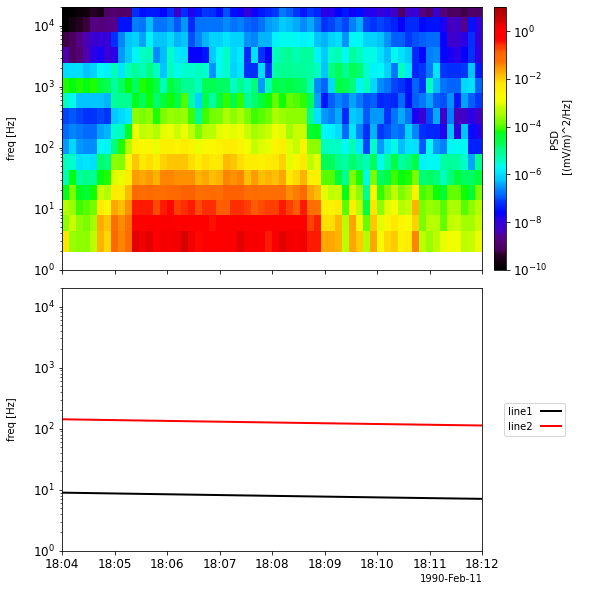

Problem with the number of line colors specified


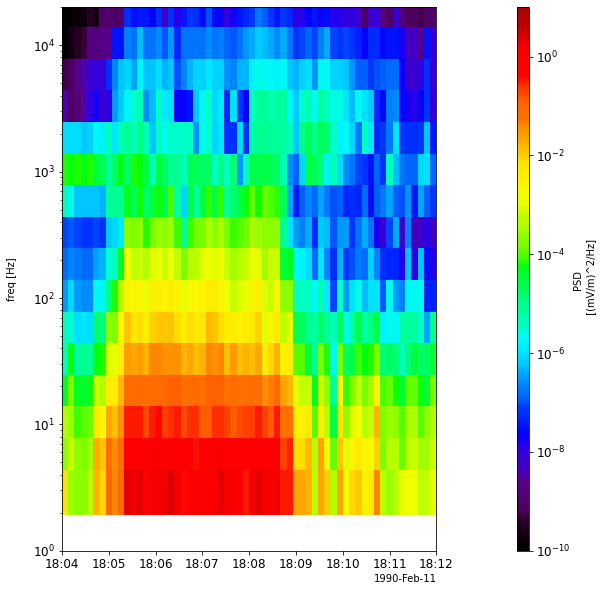

In [3]:
from load import orb, mca
import pytplot 
import numpy as np
trange = ['1990-02-11', '1990-02-12']
mca(trange)
orb(trange)

tplot_name = ['Emax', 'Eave', 'Bmax', 'Bave']
for k in range(4):
    tplot_variable = pytplot.get_data(tplot_name[k])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)  / bandwidth
    pytplot.store_data(tplot_name[k] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_name[k] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})
    
pytplot.options('Emax_pwr', 'spec', 1)
pytplot.options('Emax_pwr', 'ylog', 1)
pytplot.options('Emax_pwr', 'zlog', 1)
pytplot.options('Emax_pwr', 'ztitle', 'PSD \n [(mV/m)^2/Hz]')
pytplot.options('Emax_pwr', 'ytitle', 'freq [Hz]')
pytplot.options('Emax_pwr', 'yrange', [1, 2e4])
pytplot.options('Emax_pwr', 'zrange', [1e-10, 10])


Bx = pytplot.get_data('akb_Bmdl_X')
By = pytplot.get_data('akb_Bmdl_Y')
Bz = pytplot.get_data('akb_Bmdl_Z')
B = np.sqrt(Bx.y**2 + By.y**2 + Bz.y**2) * 1e-9

mass_o = 2.656e-26
mass_h = 1.67e-27
q = 1.60217663e-19

O_gyro = q*B/mass_o/(2*np.pi)
H_gyro = q*B/mass_h/(2*np.pi)
gyro_matrix = np.array([O_gyro, H_gyro]).T
pytplot.store_data('gyro_freq', data = {'x': Bx.times, 'y':gyro_matrix})
pytplot.options('gyro_freq', 'ylog', 1)
pytplot.options('gyro_freq', 'yrange', [1, 2e4])
pytplot.options('gyro_freq', 'ytitle', 'freq [Hz]')
pytplot.options('gyro_freq', 'thick', 2)
pytplot.options('gyro_freq', 'legend_names', ['line1', 'line2'])
pytplot.options('gyro_freq', 'legend_location', 'spedas')

pytplot.store_data('Emax_pwr-w-gyro_freq', data = 'Emax_pwr gyro_freq')
pytplot.tlimit(['1990-02-11 18:04:00', '1990-02-11 18:12:00'])
from pytplot import tplot_options

tplot_options('xmargin', [0.1, 0.25])
pytplot.tplot(['Emax_pwr', 'gyro_freq'])
pytplot.tplot('Emax_pwr-w-gyro_freq')

二つ目にくっつけたtplot変数のyrange, ytitleが適応される

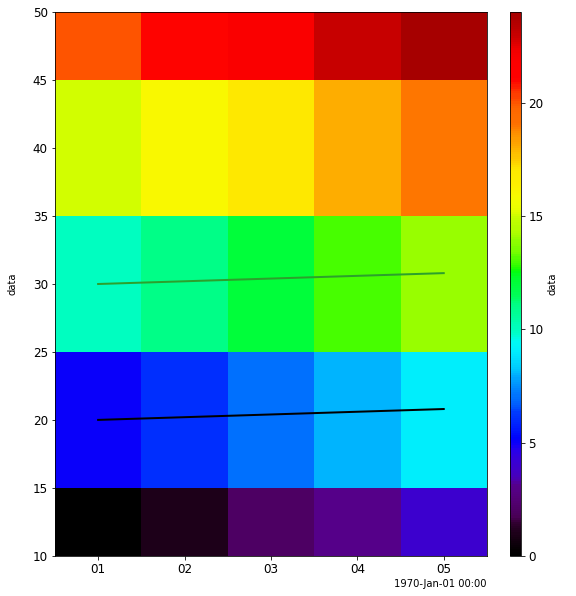

In [64]:
import numpy as np
from pytplot import store_data, options, tplot, tplot_names
data = np.array([[0,       1,       2,       3,       4],
           [5,       6,       7,       8,       9],
          [10,      11,      12,      13,      14],
          [15,      16,      17,      18,      19],
          [20,      21,      22,      23,      24]])
store_data('data', data={'x': [1, 2, 3, 4, 5], 'y': data.transpose(), 'v': [10, 20, 30, 40, 50]})
options('data', 'spec', True)
import numpy as np
store_data('lines', data={'x':[1, 2, 3, 4, 5],'y':np.array([[20, 20.2, 20.4, 20.6, 20.8], [30, 30.2, 30.4, 30.6, 30.8]]).T})
#options('lines', 'legend_names', ['Line1', 'Line2'])
options('lines', 'Colormap', 'k')
options('lines', 'thick', 2)
options('lines', 'yrange', [10, 50])
options('lines', 'ytitle', 'data')

store_data('spec_w_lines', data='data lines')

tplot('spec_w_lines')

観測高度の最大最小値の探索

In [19]:
import pyspedas
import pytplot
from pytplot import options, tplot, tlimit, tplot_options, get_data, store_data
import numpy as np
from load import mca, orb

Alt_max = 0
Alt_min = 10000

start_day_string = '1990-01-01'
start_day_time_double = pyspedas.time_double(start_day_string)

seconds_per_day = 86400
day_list = []
for i in range(0, 185):
    time_double = start_day_time_double + i * seconds_per_day
    day_list.append(pyspedas.time_string(time_double, fmt='%Y-%m-%d %H:%M:%S'))

for k in range(len(day_list)-1):
    
    trange = [day_list[k], day_list[k+1]]
    print(trange)
    try:
        mca(trange= trange)
    except Exception as e:
        print(e)
        continue
    try:
        orb(trange= trange)
    except Exception as e:
        print(e)
        #with open('./akebono_orbit_error_day_list.txt', mode="a") as f:
        #       f.write(trange[0] + '\n')
        
        #print('orbit file does not exists')
        continue
    try:
        pyspedas.tinterpol('akb_ILAT', interp_to='Emax', newname = 'ILAT')
    except:
        with open('./akebono_orbit_error_day_list.txt', mode="a") as f:
                f.write(trange[0] + '\n')
        print('orbit file is not perfect')
        continue
    
    tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
    for i in range(4):
        tplot_variable = pytplot.get_data(tplot_names[i])
        tplot_variable_float = (tplot_variable.y).astype(float)
        np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
        tplot_variable_0dB = 1e-6 #mV or pT
        bandwidth = tplot_variable.v * 0.3
        tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
        tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2)
        pytplot.store_data(tplot_names[i] +'_Amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
        pytplot.store_data(tplot_names[i] +'_Pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})
    
    pyspedas.tinterpol('akb_Pass', interp_to='Emax', newname = 'Pass', method = 'nearest')
    pyspedas.tinterpol('akb_ALT', interp_to='Emax', newname = 'ALT')
    pyspedas.tinterpol('akb_MLT', interp_to='Emax', newname = 'MLT', method = 'nearest')
    
    ILAT = get_data('ILAT')
    MLT = get_data('MLT')
    ALT = get_data('ALT')
    Emax_pwr = get_data('Emax_Pwr')
    Emax_pwr_10Hz = Emax_pwr.y.T[2]
    cusp_index_tuple = np.where((Emax_pwr_10Hz > 0.1)&(ILAT.y > 55)&(MLT.y > 10)&(MLT.y < 14))
    cusp_index = cusp_index_tuple[0]
    if len(cusp_index) == 0:
        continue 
    Alt_max_day = np.nanmax(ALT.y[cusp_index])
    Alt_min_day = np.nanmin(ALT.y[cusp_index])
    if Alt_max_day > Alt_max:
        Alt_max = Alt_max_day
        print(Alt_max)
    if Alt_min_day < Alt_min:
        Alt_min = Alt_min_day
        print(Alt_min)
    

['1990-01-01 00:00:00', '1990-01-02 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-02 00:00:00', '1990-01-03 00:00:00']
HTTP Error 404: Not Found
['1990-01-03 00:00:00', '1990-01-04 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-04 00:00:00', '1990-01-05 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-05 00:00:00', '1990-01-06 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (nearest) was applied to: Pass
tinterpol (linear) was applied to: ALT
tinterpol (nearest) was applied to: MLT
['1990-01-06 00:00:00', '1990-01-07 00:00:00']
tinterpol (linear) was applied to: ILAT
tinterpol (n

In [20]:
print(Alt_min, Alt_max)

336.45733333333334 9931.985333333334


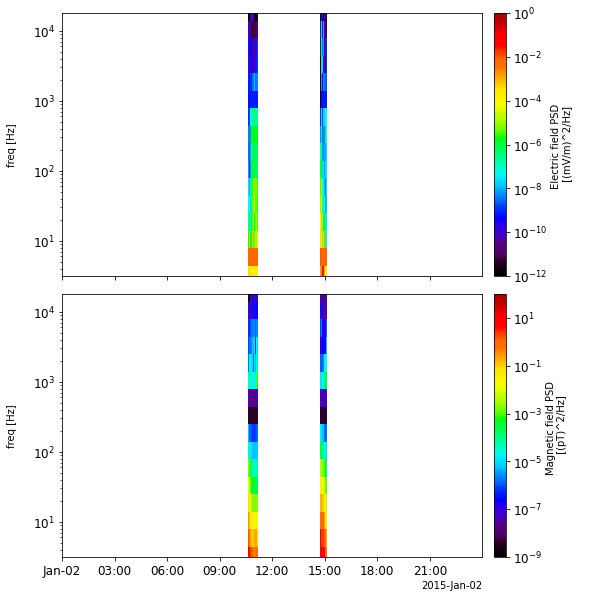

In [15]:
import load 
import pytplot
import pyspedas
import numpy as np

trange = ['2015-01-02', '2015-01-03']
load.mca(trange)
tplot_names = ['Emax', 'Eave', 'Bmax', 'Bave']
for i in range(4):
    tplot_variable = pytplot.get_data(tplot_names[i])
    tplot_variable_float = (tplot_variable.y).astype(float)
    np.place(tplot_variable_float, tplot_variable_float == 254, np.nan)
    tplot_variable_0dB = 1e-6 #mV or pT
    bandwidth = tplot_variable.v * 0.3
    tplot_variable_amplitude = (10**(tplot_variable_float/20)) * (tplot_variable_0dB)  / np.sqrt(bandwidth)
    tplot_variable_power = (10**(tplot_variable_float/10)) * ((tplot_variable_0dB)**2) / bandwidth
    pytplot.store_data(tplot_names[i] +'_amp', data={'x': tplot_variable.times, 'y': tplot_variable_amplitude, 'v': tplot_variable.v})
    pytplot.store_data(tplot_names[i] +'_pwr', data={'x': tplot_variable.times, 'y': tplot_variable_power, 'v': tplot_variable.v})
    
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'spec', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ylog', 1)
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'zlog', 1)
pytplot.options('Emax_pwr', 'ztitle', 'Electric field PSD \n [(mV/m)^2/Hz]')
pytplot.options('Emax_pwr', 'zrange', [1e-12, 1])
pytplot.options('Bmax_pwr', 'ztitle', 'Magnetic field PSD \n [(pT)^2/Hz]')
pytplot.options('Bmax_pwr', 'zrange', [1e-9, 100])
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'ytitle', 'freq [Hz]')
pytplot.tlimit([trange[0]+' 00:00:00', trange[0]+' 23:59:59'])
pytplot.tplot(['Emax_pwr', 'Bmax_pwr'])

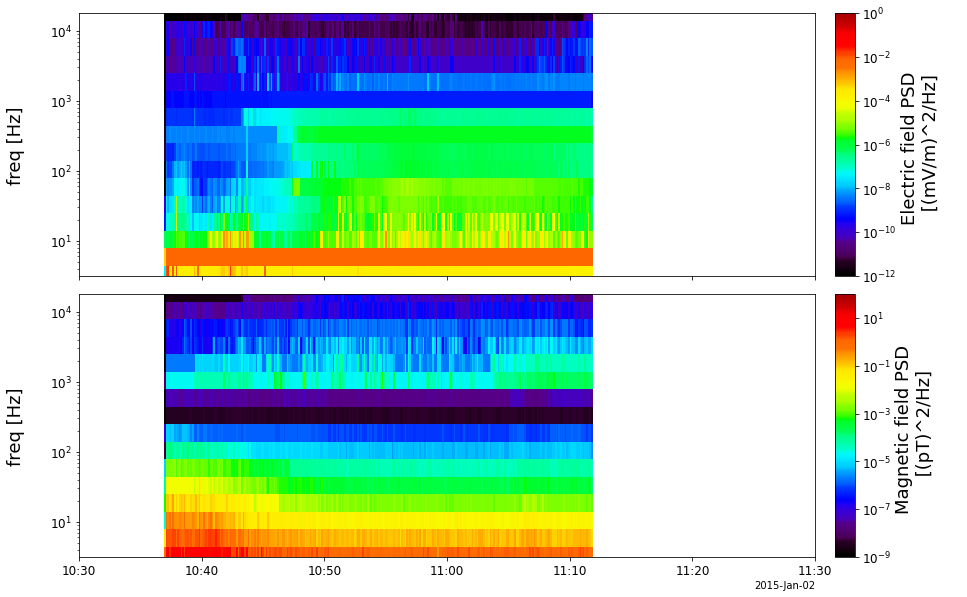

In [17]:
pytplot.tlimit(['2015-01-02 10:30:00', '2015-01-02 11:30:00'])
pytplot.options(['Emax_pwr', 'Bmax_pwr'], 'char_size', 18)
pytplot.tplot(['Emax_pwr', 'Bmax_pwr'], xsize = 14)